### Overview

**Problem Statement:** Predict the probability of a candidate looking for a new job

Essentially, I'll be attempting to predict who is job-seeking and who is not.

Note - The main focus of this notebook is on data visualization so the predictive models can almost certainly be improved upon with some basic tweaks.

Remember though, in industry it is difficult to deploy models that take hours to retrain daily. A good model is often better - and more practical - than a perfect one. Although this should be assessed on a case-by-case basis of course.

### Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.ticker as mtick
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Read Dataset

In [2]:
train = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/HR-Analysis/aug_train.csv')
test = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/HR-Analysis/aug_test.csv')
test_target = np.load('/content/gdrive/MyDrive/Colab Notebooks/HR-Analysis/jobchange_test_target_values.npy')

In [3]:
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [4]:
print('train data',train.shape)
print('test data', test.shape)

train data (19158, 14)
test data (2129, 13)


In [5]:
def summerize_data(df):
    for column in df.columns:
        print (column)
        if df.dtypes[column] == np.object: # Categorical data
            print (df[column].value_counts())
        else:
            print (df[column].describe()) 
            
        print ('\n')
    
summerize_data(train)

enrollee_id
count    19158.000000
mean     16875.358179
std       9616.292592
min          1.000000
25%       8554.250000
50%      16982.500000
75%      25169.750000
max      33380.000000
Name: enrollee_id, dtype: float64


city
city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_111       3
city_129       3
city_121       3
city_140       1
city_171       1
Name: city, Length: 123, dtype: int64


city_development_index
count    19158.000000
mean         0.828848
std          0.123362
min          0.448000
25%          0.740000
50%          0.903000
75%          0.920000
max          0.949000
Name: city_development_index, dtype: float64


gender
Male      13221
Female     1238
Other       191
Name: gender, dtype: int64


relevent_experience
Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64


enrolled_university
no_enrollment       13817
Full time course     3757
Part time cour

In [6]:
def summerize_data(df):
    for column in df.columns:
        print (column)
        if df.dtypes[column] == np.object: # Categorical data
            print (df[column].value_counts())
        else:
            print (df[column].describe()) 
            
        print ('\n')
    
summerize_data(test)

enrollee_id
count     2129.000000
mean     16861.614843
std       9576.846029
min          3.000000
25%       8562.000000
50%      16816.000000
75%      25129.000000
max      33353.000000
Name: enrollee_id, dtype: float64


city
city_103    473
city_21     318
city_16     168
city_114    155
city_160    113
           ... 
city_78       1
city_107      1
city_117      1
city_133      1
city_39       1
Name: city, Length: 108, dtype: int64


city_development_index
count    2129.000000
mean        0.824984
std         0.125074
min         0.448000
25%         0.698000
50%         0.903000
75%         0.920000
max         0.949000
Name: city_development_index, dtype: float64


gender
Male      1460
Female     137
Other       24
Name: gender, dtype: int64


relevent_experience
Has relevent experience    1524
No relevent experience      605
Name: relevent_experience, dtype: int64


enrolled_university
no_enrollment       1519
Full time course     435
Part time course     144
Name: enrolled_

### Data Preparation

#### Dealing with missing values

In [7]:
train.isna().sum()/len(train)

enrollee_id               0.000000
city                      0.000000
city_development_index    0.000000
gender                    0.235306
relevent_experience       0.000000
enrolled_university       0.020148
education_level           0.024011
major_discipline          0.146832
experience                0.003393
company_size              0.309949
company_type              0.320493
last_new_job              0.022080
training_hours            0.000000
target                    0.000000
dtype: float64

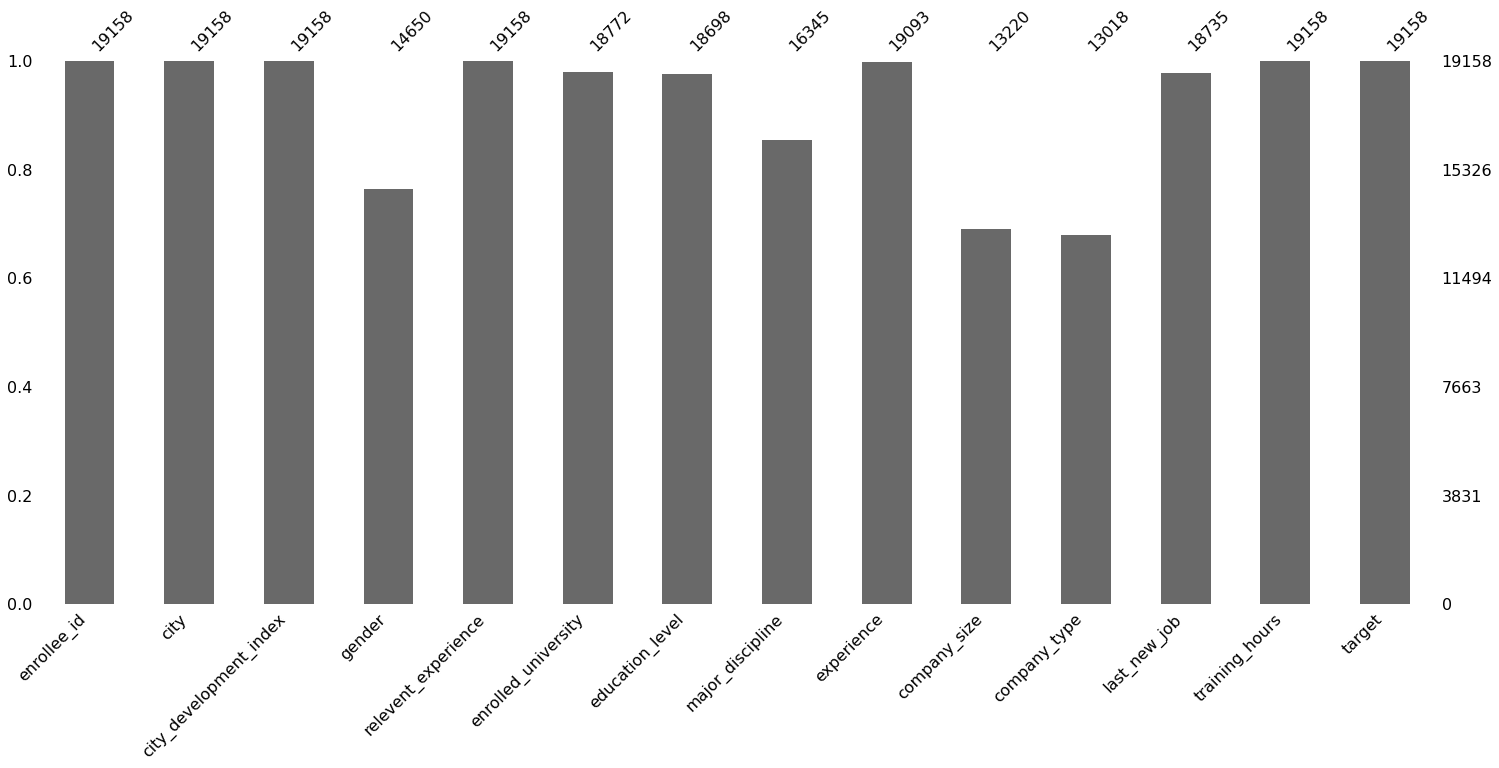

In [8]:
msno.bar(train)

In [9]:
test.isna().sum()/len(test)

enrollee_id               0.000000
city                      0.000000
city_development_index    0.000000
gender                    0.238610
relevent_experience       0.000000
enrolled_university       0.014561
education_level           0.024425
major_discipline          0.146548
experience                0.002349
company_size              0.292156
company_type              0.297792
last_new_job              0.018788
training_hours            0.000000
dtype: float64

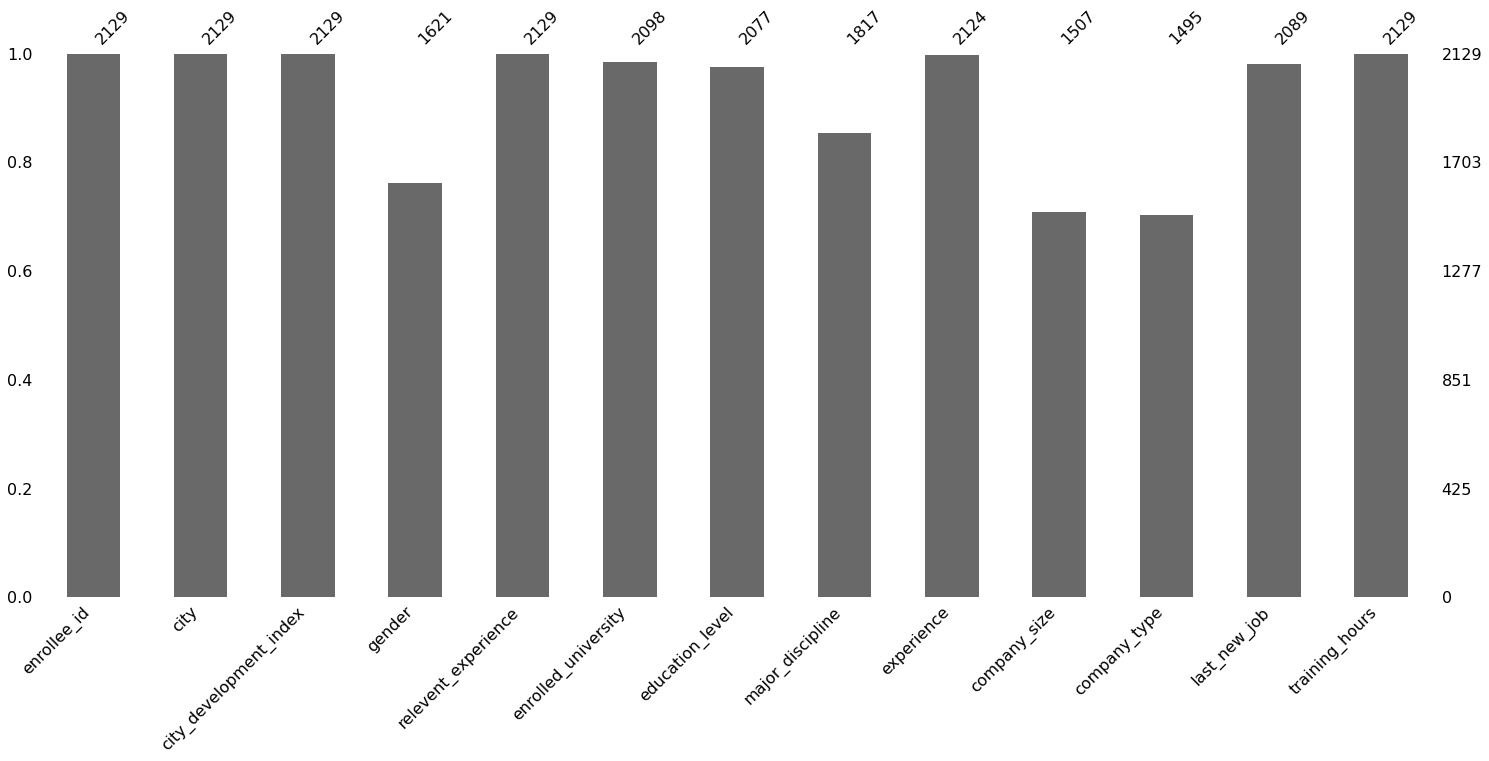

In [10]:
msno.bar(test)

We have arround 30% of missing values, handling missing values is often subjective. I want to fill missing values in categorical data which have more than 15% missing values :
* gender
* major_discipline 
* company_size              
* company_type              


In [11]:
train['gender'].fillna('Not provided', inplace=True)
train['major_discipline'].fillna('Unknown', inplace=True)
train['company_size'].fillna('0',inplace=True)
train['company_type'].fillna('Unknown',inplace=True)
train['enrolled_university'].fillna('No Enrollment',inplace=True)
train['education_level'].fillna('Unknown',inplace=True)
train['experience'].fillna('0',inplace=True)
train['last_new_job'].fillna('0',inplace=True)

test['gender'].fillna('Not provided', inplace=True)
test['major_discipline'].fillna('Unknown', inplace=True)
test['company_size'].fillna('0',inplace=True)
test['company_type'].fillna('Unknown',inplace=True)
test['enrolled_university'].fillna('No Enrollment',inplace=True)
test['education_level'].fillna('Unknown',inplace=True)
test['experience'].fillna('0',inplace=True)
test['last_new_job'].fillna('0',inplace=True)


In [12]:
train['target'].groupby(train['gender']).mean()

gender
Female          0.263328
Male            0.227819
Not provided    0.308119
Other           0.261780
Name: target, dtype: float64

In [13]:
train.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [14]:
print(train.shape)
print(test.shape)

(19158, 14)
(2129, 13)


In [15]:
train['last_new_job'] = train['last_new_job'].apply(lambda x: 'Never' if x == 'never' else x)
train['enrolled_university'] = train['enrolled_university'].apply(lambda x: 'No Enrollment' if x== 'no_enrollment' else x)
train['company_size'] = train['company_size'].apply(lambda x: '10-49' if x =='10/49' else x)

train['experience'] = train['experience'].apply(lambda x: '0' if x == '<1' else x)
train['experience'] = train['experience'].apply(lambda x: '20' if x == '>20' else x)


test['last_new_job'] = test['last_new_job'].apply(lambda x: 'Never' if x == 'never' else x)
test['enrolled_university'] = test['enrolled_university'].apply(lambda x: 'No Enrollment' if x== 'no_enrollment' else x)
test['company_size'] = test['company_size'].apply(lambda x: '10-49' if x== '10/49' else x)

test['experience'] = test['experience'].apply(lambda x: '0' if x == '<1' else x)
test['experience'] = test['experience'].apply(lambda x: '20' if x == '>20' else x)


In [16]:
train['experience'] = train['experience'].astype(int)
test['experience'] = test['experience'].astype(int)

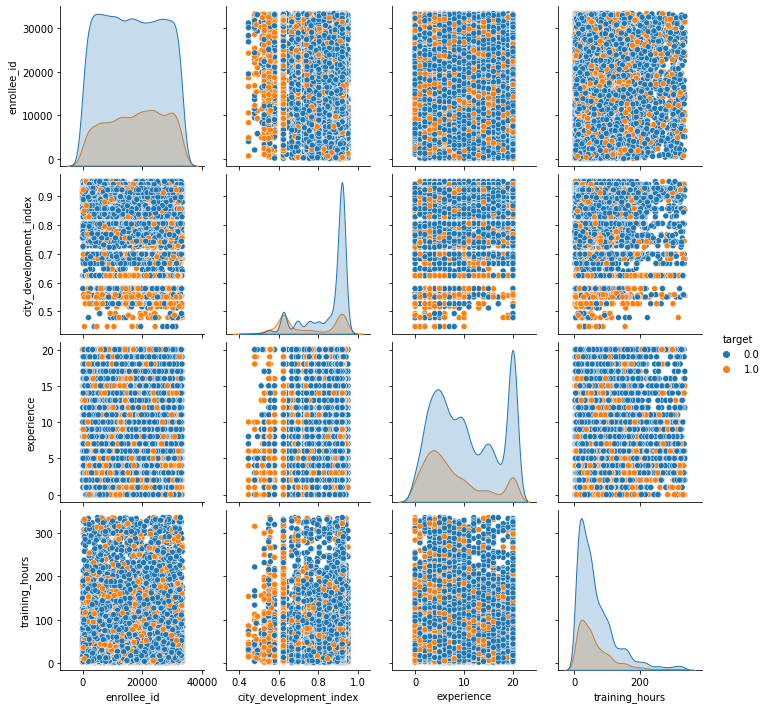

In [17]:
sns.pairplot(train,hue='target')

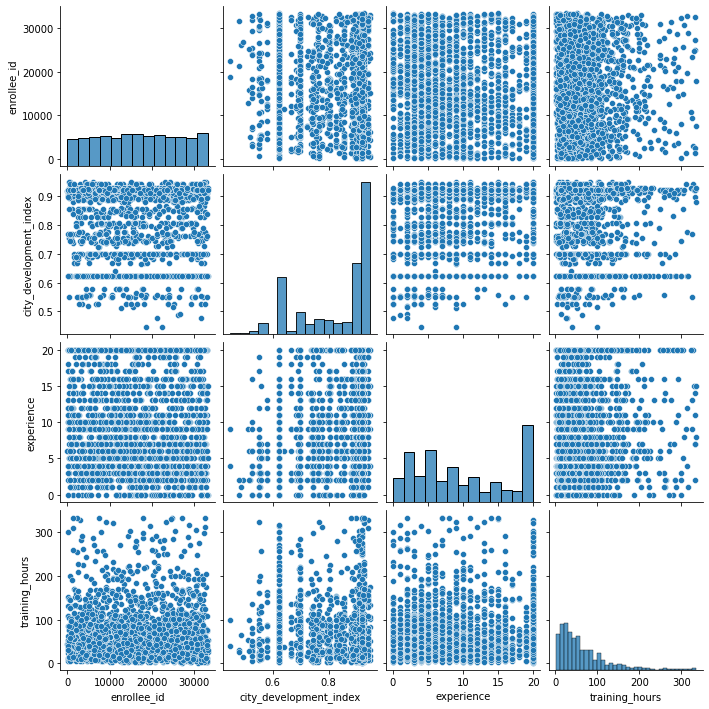

In [18]:
sns.pairplot(test)

### Data Visualization

##### How many people looking for a new role/job?

In [19]:
x = train.groupby(['target'])['target'].count()
y = len(train)
r = (x/y).round(2) 

In [20]:
ratio = pd.DataFrame(r).T
ratio

target,0.0,1.0
target,0.75,0.25


findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


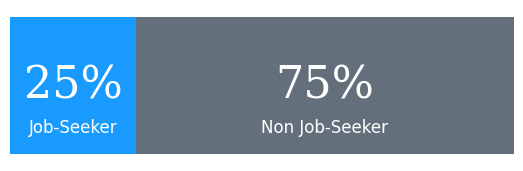

In [21]:
fig, ax = plt.subplots(1,1,figsize=(6.5, 2),dpi=100)

ax.barh(ratio.index, ratio[1.0], color='#008FFF', alpha=0.9,label='Job-Seeker')
ax.barh(ratio.index, ratio[0.0], left=ratio[1.0], color='#52616D', alpha=0.9, label='Non Job-Seeker')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
ax.legend().set_visible(False)

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
for i in ratio.index:
    ax.annotate(f"{int(ratio[1.0][i]*100)}%", xy=(ratio[1.0][i]/2, i),va = 'center', ha='center',fontsize=32, fontweight='light', fontfamily='serif',color='white')
    ax.annotate("Job-Seeker", xy=(ratio[1.0][i]/2, -0.25),va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='arial',color='white')
    
    
for i in ratio.index:
    ax.annotate(f"{int(ratio[0.0][i]*100)}%", xy=(ratio[1.0][i]+ratio[0.0][i]/2, i),va = 'center', ha='center',fontsize=32, fontweight='light', fontfamily='serif',color='white')
    ax.annotate("Non Job-Seeker", xy=(ratio[1.0][i]+ratio[0.0][i]/2, -0.25),va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='arial',color='white')
  

plt.show()

#### We have an imbalanced dataset - that is,many more non job-seekers than job-seekers.

#### This is a problem that we can address later. For now, let's continue exploring the data

#### Education Level (Train vs Test)

In [22]:
ed_train = pd.DataFrame(train['education_level'].value_counts())
ed_train['percentage'] = ed_train['education_level'].apply(lambda x: x/sum(ed_train['education_level']))*100
ed_train = ed_train.sort_index()

ed_test = pd.DataFrame(test['education_level'].value_counts())
ed_test['percentage'] = ed_test['education_level'].apply(lambda x: x/sum(ed_test['education_level']))*100
ed_test = ed_test.sort_index()

findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


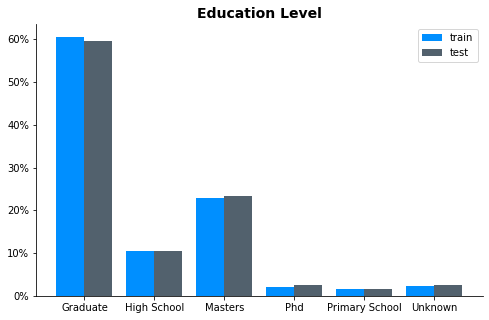

In [23]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.bar(np.arange(len(ed_train.index)), height=ed_train['percentage'], color='#008FFF', width=0.4)
ax.bar(np.arange(len(ed_test.index))+0.4, height=ed_test['percentage'],color='#52616D', width=0.4)

ax.set_xticks(np.arange(len(ed_train.index))+0.4 / 2)
ax.set_xticklabels(list(ed_train.index),rotation=0)

ax.legend(['train','test'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

sns.despine(top=True, right=True, left=False, bottom=False) # remove border

plt.title('Education Level', fontsize=14, fontweight='bold', fontfamily='arial', color='black')
plt.show()

#### Enrolled University (Train vs Test) 

In [24]:
enroll_train = pd.DataFrame(train['enrolled_university'].value_counts())
enroll_train['percentage'] = enroll_train['enrolled_university'].apply(lambda x: x/sum(enroll_train['enrolled_university']))*100
enroll_train = enroll_train.sort_index()

enroll_test = pd.DataFrame(test['enrolled_university'].value_counts())
enroll_test['percentage'] = enroll_test['enrolled_university'].apply(lambda x: x/sum(enroll_test['enrolled_university']))*100
enroll_test = enroll_test.sort_index()

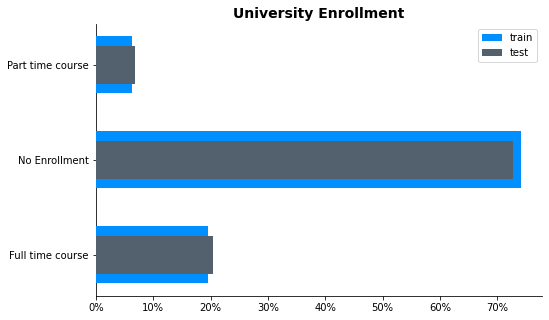

In [25]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.barh(enroll_train.index, enroll_train['percentage'], color='#008FFF', zorder=3, height=0.6)
ax.barh(enroll_test.index, enroll_test['percentage'], color='#52616D', zorder=3, height=0.4)
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(['train','test'])

plt.title('University Enrollment', fontsize=14, fontweight='bold', fontfamily='arial', color='black')
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

#### Gender (Train vs Test)

In [26]:
gen_train = pd.DataFrame(train['gender'].value_counts())
gen_train['percentage'] = gen_train['gender'].apply(lambda x: x/sum(gen_train['gender']))*100
gen_train = gen_train.sort_index()

gen_test = pd.DataFrame(test['gender'].value_counts())
gen_test['percentage'] = gen_test['gender'].apply(lambda x: x/sum(gen_test['gender']))*100
gen_test = gen_test.sort_index()

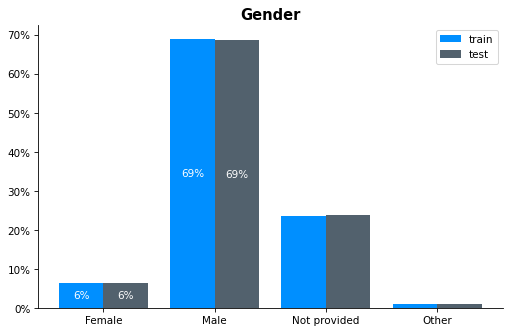

In [27]:
fig, ax = plt.subplots(1,1,figsize=(8, 5),dpi=75)

ax.bar(np.arange(len(gen_train.index)), height=gen_train['percentage'], color='#008FFF', width=0.4)
ax.bar(np.arange(len(gen_test.index))+0.4, height=gen_test['percentage'],color='#52616D', width=0.4)

ax.set_xticks(np.arange(len(gen_train.index))+0.4 / 2)
ax.set_xticklabels(list(gen_train.index),rotation=0)

ax.legend(['train','test'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

for i,j in zip([0, 1], gen_train['percentage']):
    ax.annotate(f'{j:0.0f}%',xy=(i, j/2), color='white', horizontalalignment='center', verticalalignment='center')
for i,j in zip([0, 1], gen_test['percentage']):
    ax.annotate(f'{j:0.0f}%',xy=(i+0.4, j/2), color='white', horizontalalignment='center', verticalalignment='center')
 

plt.title('Gender', fontsize=14, fontweight='bold', fontfamily='arial', color='black')
sns.despine(top=True, right=True, left=False, bottom=False) # remove border
plt.show()

####City Development Index (Train vs Test)

In [28]:
cdi_train = pd.DataFrame(train['city_development_index'])
cdi_test = pd.DataFrame(test['city_development_index'])

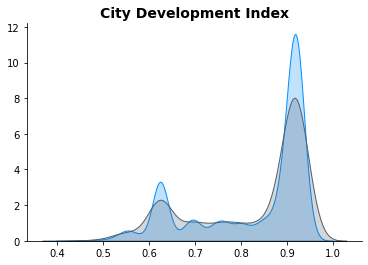

In [29]:
sns.kdeplot(cdi_train['city_development_index'], color='#008FFF', shade=True,label='train')
sns.kdeplot(cdi_test['city_development_index'], color='#52616D', shade=True,label='test')


plt.ylabel('')    
plt.xlabel('')

sns.despine(top=True, right=True, left=False, bottom=False) # remove border
plt.title('City Development Index', fontsize=14, fontweight='bold', fontfamily='arial', color='black')
plt.show()

#### Year Experience (Train vs Test)

In [30]:
ex_train = pd.DataFrame(train['experience'].value_counts())
ex_train['percentage'] = ex_train['experience'].apply(lambda x: x/sum(ex_train['experience']))*100
ex_train = ex_train.sort_index()

ex_test = pd.DataFrame(test['experience'].value_counts())
ex_test['percentage'] = ex_test['experience'].apply(lambda x: x/sum(ex_test['experience']))*100
ex_test = ex_test.sort_index()

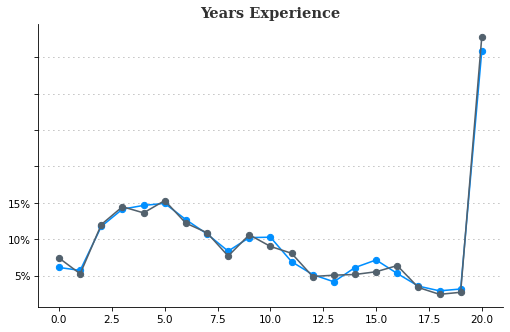

In [31]:
fig, ax = plt.subplots(figsize=(8, 5),dpi=75)

ax.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax.plot(ex_train.index, ex_train['percentage'], zorder=3, color='#008FFF', marker='o')
ax.plot(ex_test.index, ex_test['percentage'], zorder=3, color='#52616D', marker='o')

ax.set_yticklabels(labels = ['0', '5%','10%','15%',''])

sns.despine(top=True, right=True, left=False, bottom=False) # remove border
plt.title('Years Experience', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
plt.show()

#### Relevant Experience (Train vs Test)

In [32]:
re_train = pd.DataFrame(train['relevent_experience'].value_counts())
re_train['percentage'] = re_train['relevent_experience'].apply(lambda x: x/sum(re_train['relevent_experience']))*100
re_train = re_train.sort_index()

re_test = pd.DataFrame(test['relevent_experience'].value_counts())
re_test['percentage'] = re_test['relevent_experience'].apply(lambda x: x/sum(re_test['relevent_experience']))*100
re_test = re_test.sort_index()

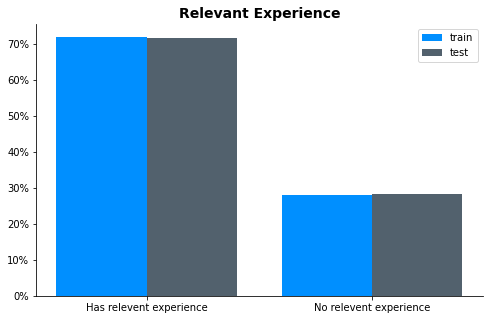

In [33]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.bar(np.arange(len(re_train.index)), height=re_train['percentage'], color='#008FFF', width=0.4)
ax.bar(np.arange(len(re_test.index))+0.4, height=re_test['percentage'],color='#52616D', width=0.4)

ax.set_xticks(np.arange(len(re_train.index))+0.4 / 2)
ax.set_xticklabels(list(re_train.index),rotation=0)

ax.legend(['train','test'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

sns.despine(top=True, right=True, left=False, bottom=False) # remove border

plt.title('Relevant Experience', fontsize=14, fontweight='bold', fontfamily='arial', color='black')
plt.show()

#### Training Experience (Train vs Test)

In [34]:
th_train = pd.DataFrame(train['training_hours'])
th_train['TrainTest'] = 'Train'
th_test = pd.DataFrame(test['training_hours'])
th_test['TrainTest'] = 'Test'

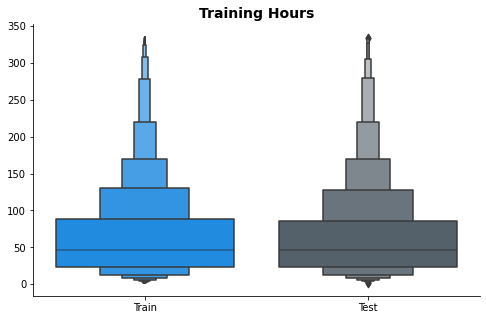

In [35]:
fig, ax = plt.subplots(figsize=(8, 5))

comb_graph_temp_df = pd.concat([th_train, th_test], axis=0)
sns.boxenplot(y="training_hours", x="TrainTest", data=comb_graph_temp_df, palette=['#008FFF', '#52616D'])
plt.xlabel("")
plt.ylabel("")

sns.despine(top=True, right=True, left=False, bottom=False) 

plt.title('Training Hours', fontsize=14, fontweight='bold', fontfamily='arial', color='black')
plt.show()

#### Major Dicipline (Train vs Test)

In [36]:
major_train = pd.DataFrame(train['major_discipline'].value_counts())
major_train['percentage'] = major_train['major_discipline'].apply(lambda x: x/sum(major_train['major_discipline']))*100
major_train = major_train.sort_index()

major_test = pd.DataFrame(test['major_discipline'].value_counts())
major_test['percentage'] = major_test['major_discipline'].apply(lambda x: x/sum(major_test['major_discipline']))*100
major_test = major_test.sort_index()

In [37]:
major_test

,major_discipline,percentage
Arts,17,0.798497
Business Degree,37,1.737905
Humanities,80,3.757633
No Major,22,1.033349
Other,40,1.878816
STEM,1621,76.139032
Unknown,312,14.654767


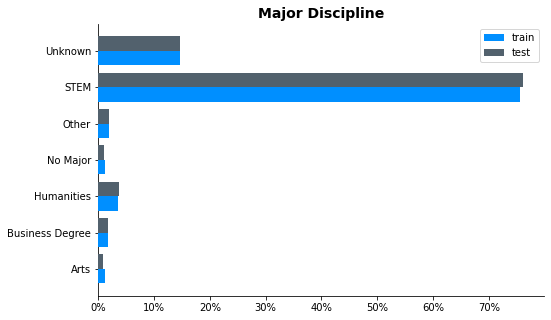

In [38]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.barh(np.arange(len(major_train.index)),major_train['percentage'], color='#008FFF', zorder=3, height=0.4)
ax.barh(np.arange(len(major_test.index))+0.4, major_test['percentage'], color='#52616D', zorder=3, height=0.4)
ax.xaxis.set_major_formatter(mtick.PercentFormatter())

ax.set_yticks(np.arange(len(major_test.index))+0.4 / 2)
ax.set_yticklabels(list(major_test.index))

ax.legend(['train','test'])
plt.title('Major Discipline', fontsize=14, fontweight='bold', fontfamily='arial', color='black')

sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

#### The Train & Tests sets are similar - that's good news
If the training set has wildy different characteristics to our test set then we really are in for a difficult time.

We'd need to ask if the training population can really help us predict the target.

In this case though, we're fine.

#### Who is looking for a new job? [insight]

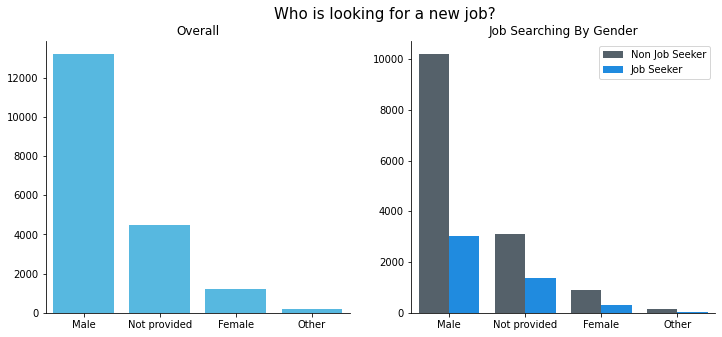

In [39]:
figure, ((ax1), (ax2)) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(12, 5)
color_palette=['#52616D','#008FFF',]

ax1.text(2.5,15000,'Who is looking for a new job?',fontsize=15)
sns.despine(top=True, right=True, left=False, bottom=False) 
sns.countplot(x=train['gender'],ax=ax1,color='#40C2F7').set_title('Overall')
sns.countplot(data=train, x='gender', hue='target',ax=ax2,palette=color_palette).set_title('Job Searching By Gender')
ax1.set_ylabel('')
ax1.set_xlabel('')
ax2.legend(['Non Job Seeker','Job Seeker'])
ax2.set_ylabel('')
ax2.set_xlabel('')

plt.show()


The most job-seeker are male. This is not all that surprising as in this dataset male make up the majority of the sample of population in dataset

#### City Development Index [insight]

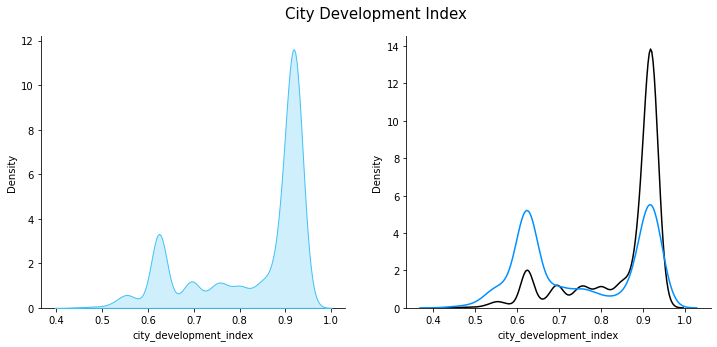

In [40]:
figure, ((ax1), (ax2)) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(12, 5)

ax1.text(0.9,13,'City Development Index',fontsize=15)
sns.despine(top=True, right=True, left=False, bottom=False) 
sns.kdeplot(train['city_development_index'], color="#40C2F7",ax=ax1, shade=True, zorder=3,label='')
sns.kdeplot(train.loc[(train["target"]==0), 'city_development_index'],ax=ax2, color='black', label='Non Job Seeker')
sns.kdeplot(train.loc[(train["target"]==1), 'city_development_index'],ax=ax2, color='#008FFF', label='Job Seeker')

plt.show()

We can see in low and high City Development Index (CDI) chat. There are two peeks job seejers high and low CDI, in high CDI area perhaps there are a lot of opportunities and therefore people feel encourage to seek better roles.

In low CDI areas candidates want to improve their circumtances by searching for new jobs, maybe in new areas

#### Jobsearching - Job Last Change, and Education

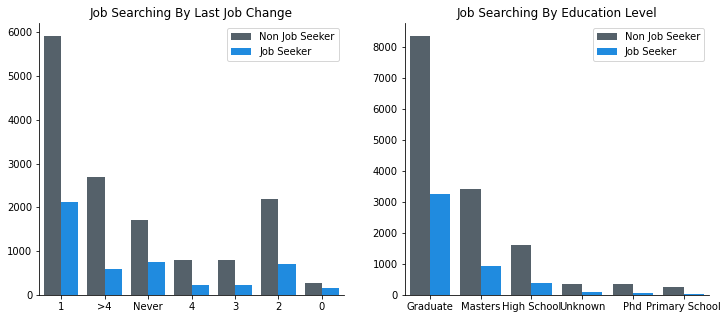

In [41]:
figure, ((ax1), (ax2)) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(12, 5)

sns.despine(top=True, right=True, left=False, bottom=False) 
sns.countplot(data=train, x='last_new_job', hue='target',ax=ax1,palette=color_palette).set_title('Job Searching By Last Job Change')
sns.countplot(data=train, x='education_level', hue='target',ax=ax2,palette=color_palette).set_title('Job Searching By Education Level')

ax2.legend(['Non Job Seeker','Job Seeker'])
ax1.legend(['Non Job Seeker','Job Seeker'])
ax1.set_ylabel('')
ax1.set_xlabel('')
ax2.set_ylabel('')
ax2.set_xlabel('')

plt.show()

We can see job seeker have change job more often dan non0job seekers within past 1 year, and also those that have never looked for a job also seems to be ready for new chlannges. They are with the most graduate education level (bachelor)

#### Training Hours and Experience

In [42]:
hour = pd.DataFrame(train.groupby(['training_hours','target']).count()['enrollee_id']).reset_index()
experience = pd.DataFrame(train.groupby(['experience','target']).count()['enrollee_id']).reset_index()
companysize = pd.DataFrame(train.groupby(['company_size','target']).count()['enrollee_id']).reset_index()

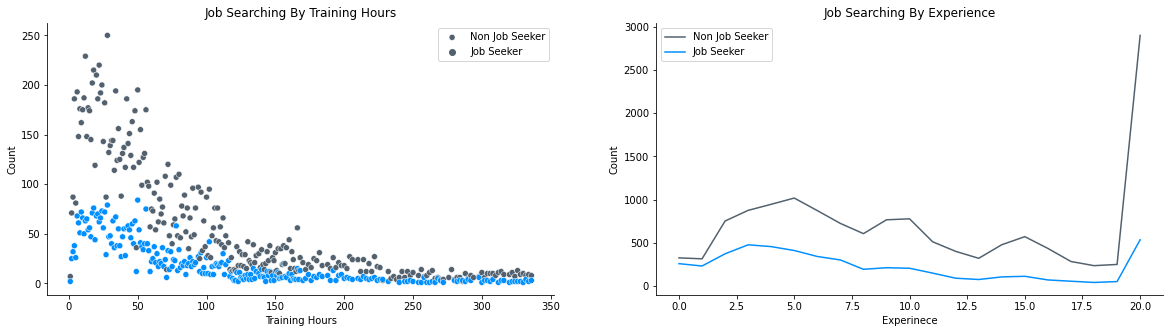

In [43]:
figure, ((ax1), (ax2)) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(20, 5)

sns.despine(top=True, right=True, left=False, bottom=False) 
sns.scatterplot(data=hour, y='enrollee_id',x='training_hours', hue='target',ax=ax1,palette=color_palette).set_title('Job Searching By Training Hours')
sns.lineplot(data=experience, y='enrollee_id',x='experience' ,hue='target',ax=ax2,palette=color_palette).set_title('Job Searching By Experience')

ax1.legend(['Non Job Seeker','Job Seeker'])
ax2.legend(['Non Job Seeker','Job Seeker'])
ax1.set_ylabel('Count')
ax1.set_xlabel('Training Hours')
ax2.set_ylabel('Count')
ax2.set_xlabel('Experinece')

plt.show()

Candidate with less hours of training are willing to change a job as compare to candidates with more trainig hours.
Of course, Candidates with 0 experience are Looking for Job and Candidates with More experience are less willing to change a job or not looking for job

#### Corrleation Matrix

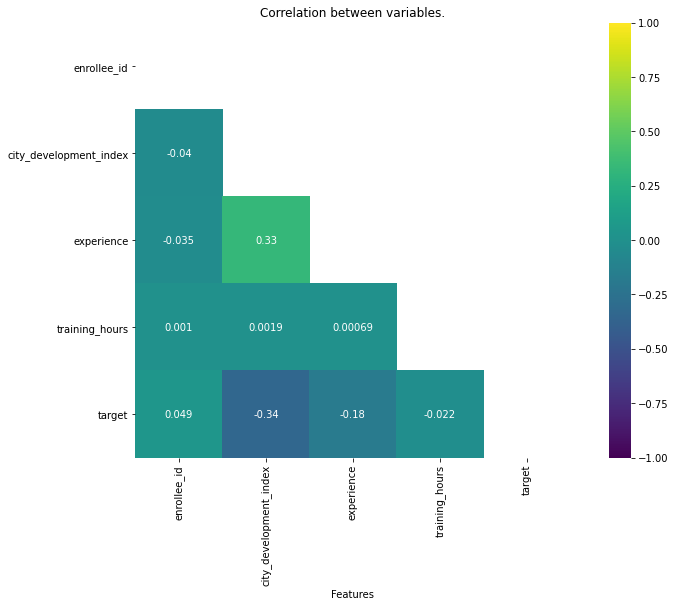

In [44]:
corr = train.corr()
mask = np.triu(corr)

plt.figure(figsize=(14, 8))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, center=0, square=True, mask=mask, cmap='viridis')

plt.xlabel("Features")
plt.title("Correlation between variables.")

plt.show()

The highest correlation to the target is city development index, and experience with city development index

### Data Preprocessing

In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  19158 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     19158 non-null  object 
 6   education_level         19158 non-null  object 
 7   major_discipline        19158 non-null  object 
 8   experience              19158 non-null  int64  
 9   company_size            19158 non-null  object 
 10  company_type            19158 non-null  object 
 11  last_new_job            19158 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(3), object(9)
mem

In [46]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   city_development_index  2129 non-null   float64
 3   gender                  2129 non-null   object 
 4   relevent_experience     2129 non-null   object 
 5   enrolled_university     2129 non-null   object 
 6   education_level         2129 non-null   object 
 7   major_discipline        2129 non-null   object 
 8   experience              2129 non-null   int64  
 9   company_size            2129 non-null   object 
 10  company_type            2129 non-null   object 
 11  last_new_job            2129 non-null   object 
 12  training_hours          2129 non-null   int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 216.4+ KB


In [47]:
features = train.copy()
X = features.drop(columns=['target','enrollee_id'])
y = features['target']
X_test  = test.copy().drop(columns=['enrollee_id'])

In [48]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [49]:
le = LabelEncoder()

gender_dict ={'Male':3,
              'Not provided':0,
              'Female' :2,          
              'Other' :1}

relevent_experience_dict = {'Has relevent experience':1,
                            'No relevent experience':0}

enrolled_university_dict = {'No Enrollment':0,
                            'Full time course':2,
                            'Part time course':1}

education_level_dict = {'Graduate':2,
                   'Masters':3,
                   'High School':1,
                   'Phd':4,
                   'Primary School':0,
                   'Unknown':0}

X['city'] = le.fit_transform(X['city']) 
X['gender'] = X['gender'].map(gender_dict)
X['relevent_experience'] = X['relevent_experience'].map(relevent_experience_dict)
X['enrolled_university'] = X['enrolled_university'].map(enrolled_university_dict)
X['education_level'] = X['education_level'].map(education_level_dict)
X['major_discipline'] = le.fit_transform(X['major_discipline'])
X['company_size'] = le.fit_transform(X['company_size'])
X['company_type'] = le.fit_transform(X['company_type'])
X['last_new_job'] = le.fit_transform(X['last_new_job'])


X_test['city'] = le.fit_transform(X_test['city']) 
X_test['gender'] = X_test['gender'].map(gender_dict)
X_test['relevent_experience'] = X_test['relevent_experience'].map(relevent_experience_dict)
X_test['enrolled_university'] = X_test['enrolled_university'].map(enrolled_university_dict)
X_test['education_level'] = X_test['education_level'].map(education_level_dict)
X_test['major_discipline'] = le.fit_transform(X_test['major_discipline'])
X_test['company_size'] = le.fit_transform(X_test['company_size'])
X_test['company_type'] = le.fit_transform(X_test['company_type'])
X_test['last_new_job'] = le.fit_transform(X_test['last_new_job'])



#scaler = MinMaxScaler()
#X['training_hours'] = scaler.fit_transform(X['training_hours'].values.reshape(-1, 1)) 
#X_test['training_hours'] = scaler.transform(X_test['training_hours'].values.reshape(-1, 1)) 

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score 
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import BorderlineSMOTE,SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [51]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=42, stratify =y)

In [52]:
skf = StratifiedKFold(n_splits= 5)

### Modelling

In [53]:
X_train

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
354,48,0.910,3,0,0,3,5,5,4,5,6,31
11526,89,0.866,0,1,0,2,5,14,5,5,5,66
4025,5,0.920,3,1,0,2,5,20,2,5,1,206
2441,64,0.624,3,1,0,3,5,12,8,1,2,26
12537,30,0.897,3,1,0,4,5,20,3,4,6,29
...,...,...,...,...,...,...,...,...,...,...,...,...
1316,49,0.920,3,1,0,2,5,13,0,6,5,47
3512,6,0.924,3,0,2,2,5,4,0,6,1,50
10566,74,0.893,2,1,0,3,5,14,2,5,1,34
3085,64,0.624,2,1,0,2,5,15,1,1,2,112


In [54]:
models=[LogisticRegression(),
        LinearSVC(),
        KNeighborsClassifier(),
        RandomForestClassifier(),
        XGBClassifier()]

model_names=['Logistic Regression',
             'Linear SVM',
             'KNN',
             'Random Forrest',
             'XGBoost']

acc_score =[]
recall = []
precission = []
f1  = []
roc_auc = []

d={}

for model in range (len(models)):
    clf=models[model]
    clf.fit(X_train.values,y_train.values)
    y_pred=clf.predict(X_valid.values)

    #obtaining scoring for training
    acc_score.append(accuracy_score(y_valid, y_pred))
    recall.append(recall_score(y_valid, y_pred))
    precission.append(precision_score(y_valid, y_pred))
    f1.append(f1_score(y_valid,y_pred))
    roc_auc.append(roc_auc_score(y_valid,y_pred))

  


d={'Modelling Algo':model_names,'Accuracy Score':acc_score, 'Recall Score':recall, 'Precission Score':precission, 'F1 Score':f1, 'ROC AUC Score':roc_auc}   
pd.DataFrame(d)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


,Modelling Algo,Accuracy Score,Recall Score,Precission Score,F1 Score,ROC AUC Score
0,Logistic Regression,0.760960,0.207705,0.554810,0.302255,0.576183
1,Linear SVM,0.758664,0.198492,0.543578,0.290798,0.571577
2,KNN,0.755950,0.371022,0.514518,0.431144,0.627391
3,Random Forrest,0.781837,0.483250,0.574129,0.524784,0.682114
4,XGBoost,0.795825,0.570352,0.594241,0.582051,0.720521


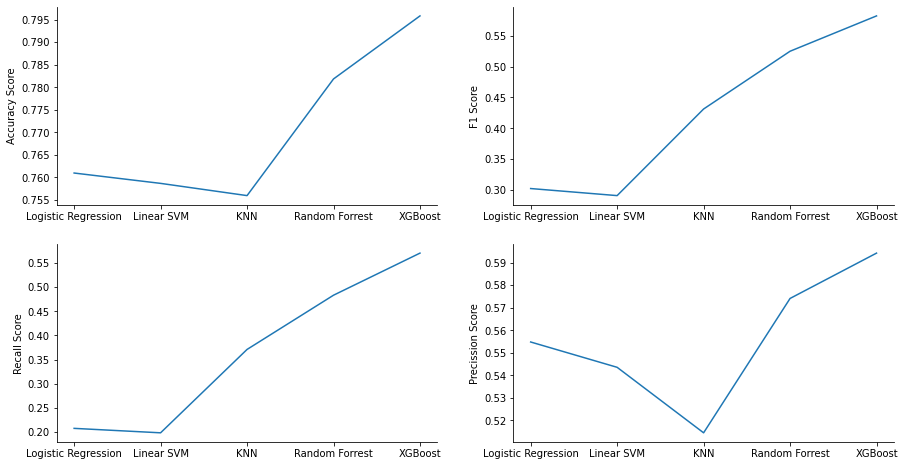

In [55]:
figure, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(15, 8)

sns.despine(top=True, right=True, left=False, bottom=False)

sns.lineplot(data=d, x='Modelling Algo',y='Accuracy Score',ax=ax1,palette=color_palette)
sns.lineplot(data=d, x='Modelling Algo',y='Recall Score' ,ax=ax3,palette=color_palette)
sns.lineplot(data=d, x='Modelling Algo',y='Precission Score' ,ax=ax4,palette=color_palette)
sns.lineplot(data=d, x='Modelling Algo',y='F1 Score' ,ax=ax2,palette=color_palette)


ax1.set_xlabel('')
ax2.set_xlabel('')
ax3.set_xlabel('')
ax4.set_xlabel('')

plt.show()

Logisctic Regression : better to detect 

### Handling Imbalance Target with RandomUndersampling

In [56]:
undersample = RandomUnderSampler(sampling_strategy='majority')
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)
print("Before undersampling: ", Counter(y_train))
print("After undersampling: ", Counter(y_train_under))

model_under = LogisticRegression()
model_under.fit(X_train_under, y_train_under)
y_pred = model_under.predict(X_valid)
print(classification_report(y_valid, y_pred))

Before undersampling:  Counter({0.0: 10785, 1.0: 3583})
After undersampling:  Counter({0.0: 3583, 1.0: 3583})
              precision    recall  f1-score   support

         0.0       0.84      0.67      0.74      3596
         1.0       0.38      0.62      0.47      1194

    accuracy                           0.65      4790
   macro avg       0.61      0.64      0.61      4790
weighted avg       0.73      0.65      0.68      4790



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [57]:
models=[LogisticRegression(),
        LinearSVC(),
        KNeighborsClassifier(),
        RandomForestClassifier(),
        XGBClassifier()]

model_names=['Logistic Regression',
             'Linear SVM',
             'KNN',
             'Random Forrest',
             'XGBoost']
acc_score =[]
recall = []
precission = []
f1  = []
roc_auc = []

e={}

for model in range (len(models)):
    clf=models[model]
    clf.fit(X_train_under,y_train_under)
    y_pred=clf.predict(X_valid.values)

    #obtaining scoring for training
    acc_score.append(accuracy_score(y_valid, y_pred))
    recall.append(recall_score(y_valid, y_pred))
    precission.append(precision_score(y_valid, y_pred))
    f1.append(f1_score(y_valid,y_pred))
    roc_auc.append(roc_auc_score(y_valid,y_pred))

  


e={'Modelling Algo':model_names,'Accuracy Score':acc_score, 'Recall Score':recall, 'Precission Score':precission, 'F1 Score':f1, 'ROC AUC Score':roc_auc}   
pd.DataFrame(e)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


,Modelling Algo,Accuracy Score,Recall Score,Precission Score,F1 Score,ROC AUC Score
0,Logistic Regression,0.654906,0.618928,0.381518,0.472054,0.642890
1,Linear SVM,0.316284,0.975712,0.264112,0.415700,0.536521
2,KNN,0.653027,0.663317,0.385965,0.487985,0.656464
3,Random Forrest,0.770355,0.752094,0.527615,0.620166,0.764256
4,XGBoost,0.779332,0.782245,0.539573,0.638632,0.780305


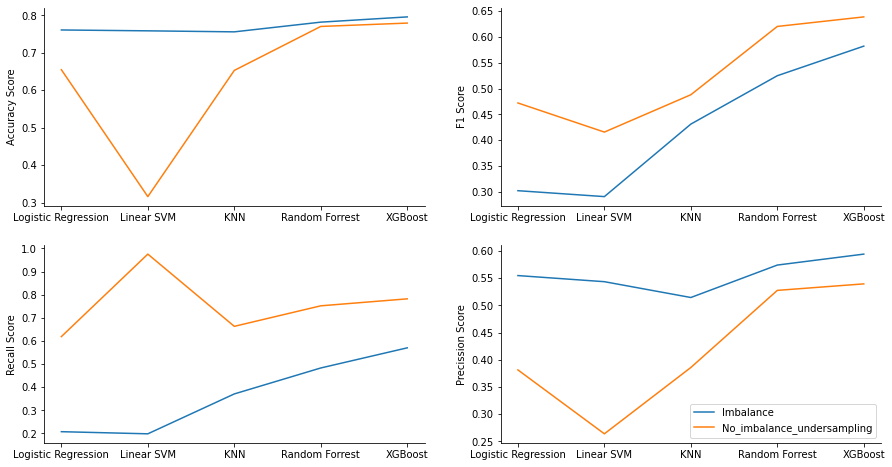

In [58]:
figure, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(15, 8)

sns.despine(top=True, right=True, left=False, bottom=False)

sns.lineplot(data=d, x='Modelling Algo',y='Accuracy Score',ax=ax1)
sns.lineplot(data=d, x='Modelling Algo',y='Recall Score' ,ax=ax3)
sns.lineplot(data=d, x='Modelling Algo',y='Precission Score' ,ax=ax4)
sns.lineplot(data=d, x='Modelling Algo',y='F1 Score' ,ax=ax2)

sns.lineplot(data=e, x='Modelling Algo',y='Accuracy Score',ax=ax1)
sns.lineplot(data=e, x='Modelling Algo',y='Recall Score' ,ax=ax3)
sns.lineplot(data=e, x='Modelling Algo',y='Precission Score' ,ax=ax4)
sns.lineplot(data=e, x='Modelling Algo',y='F1 Score' ,ax=ax2)

plt.legend(['Imbalance', 'No_imbalance_undersampling'])

ax1.set_xlabel('')
ax2.set_xlabel('')
ax3.set_xlabel('')
ax4.set_xlabel('')

plt.show()

In [59]:
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train.values, y_train.values)
print("Before undersampling: ", Counter(y_train))
print("After undersampling: ", Counter(y_train_smote))

model_smote = XGBClassifier()
model_smote.fit(X_train_smote, y_train_smote)
y_pred = model_smote.predict(X_valid.values)
print(classification_report(y_valid, y_pred))

Before undersampling:  Counter({0.0: 10785, 1.0: 3583})
After undersampling:  Counter({0.0: 10785, 1.0: 10785})
              precision    recall  f1-score   support

         0.0       0.88      0.83      0.86      3596
         1.0       0.57      0.67      0.62      1194

    accuracy                           0.79      4790
   macro avg       0.73      0.75      0.74      4790
weighted avg       0.81      0.79      0.80      4790



In [60]:
models=[LogisticRegression(),
        LinearSVC(),
        KNeighborsClassifier(),
        RandomForestClassifier(),
        XGBClassifier()]

model_names=['Logistic Regression',
             'Linear SVM',
             'KNN',
             'Random Forrest',
             'XGBoost']

acc_score =[]
recall = []
precission = []
f1  = []
roc_auc = []

i={}

for model in range (len(models)):
    clf=models[model]
    clf.fit(X_train_smote,y_train_smote)
    y_pred=clf.predict(X_valid.values)

    #obtaining scoring for training
    acc_score.append(accuracy_score(y_valid, y_pred))
    recall.append(recall_score(y_valid, y_pred))
    precission.append(precision_score(y_valid, y_pred))
    f1.append(f1_score(y_valid,y_pred))
    roc_auc.append(roc_auc_score(y_valid,y_pred))

  


i={'Modelling Algo':model_names,'Accuracy Score':acc_score, 'Recall Score':recall, 'Precission Score':precission, 'F1 Score':f1, 'ROC AUC Score':roc_auc}   
pd.DataFrame(i)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


,Modelling Algo,Accuracy Score,Recall Score,Precission Score,F1 Score,ROC AUC Score
0,Logistic Regression,0.687056,0.678392,0.420779,0.519397,0.684163
1,Linear SVM,0.582672,0.446399,0.284874,0.347798,0.537159
2,KNN,0.647808,0.646566,0.378989,0.477871,0.647393
3,Random Forrest,0.780585,0.520938,0.564941,0.542048,0.693867
4,XGBoost,0.792693,0.665829,0.572354,0.615563,0.750323


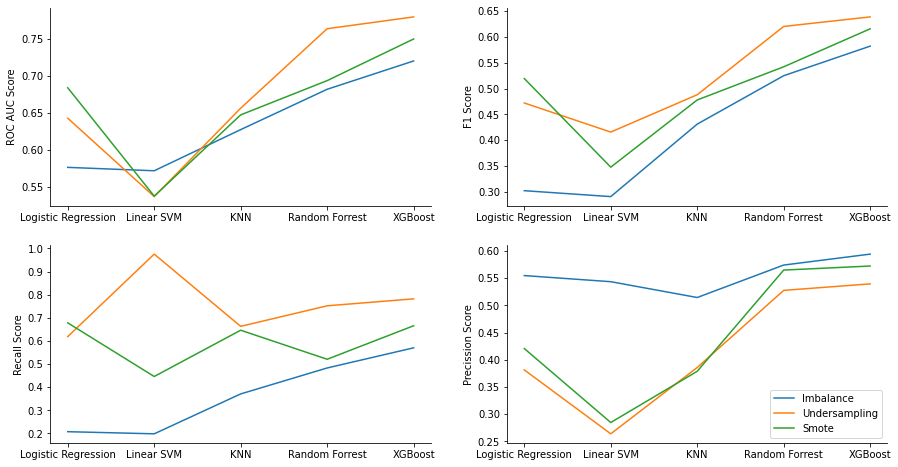

In [61]:
figure, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(15, 8)

sns.despine(top=True, right=True, left=False, bottom=False)

sns.lineplot(data=d, x='Modelling Algo',y='ROC AUC Score',ax=ax1)
sns.lineplot(data=d, x='Modelling Algo',y='Recall Score' ,ax=ax3)
sns.lineplot(data=d, x='Modelling Algo',y='Precission Score' ,ax=ax4)
sns.lineplot(data=d, x='Modelling Algo',y='F1 Score' ,ax=ax2)

sns.lineplot(data=e, x='Modelling Algo',y='ROC AUC Score',ax=ax1)
sns.lineplot(data=e, x='Modelling Algo',y='Recall Score' ,ax=ax3)
sns.lineplot(data=e, x='Modelling Algo',y='Precission Score' ,ax=ax4)
sns.lineplot(data=e, x='Modelling Algo',y='F1 Score' ,ax=ax2)

sns.lineplot(data=i, x='Modelling Algo',y='ROC AUC Score',ax=ax1)
sns.lineplot(data=i, x='Modelling Algo',y='Recall Score' ,ax=ax3)
sns.lineplot(data=i, x='Modelling Algo',y='Precission Score' ,ax=ax4)
sns.lineplot(data=i, x='Modelling Algo',y='F1 Score' ,ax=ax2)



plt.legend(['Imbalance', 'Undersampling','Smote'])

ax1.set_xlabel('')
ax2.set_xlabel('')
ax3.set_xlabel('')
ax4.set_xlabel('')

plt.show()

In [62]:
!pip install optuna

     |████████████████████████████████| 302 kB 13.2 MB/s 
     |████████████████████████████████| 80 kB 8.5 MB/s 
     |████████████████████████████████| 208 kB 45.4 MB/s 
     |████████████████████████████████| 75 kB 4.2 MB/s 
     |████████████████████████████████| 49 kB 5.4 MB/s 
     |████████████████████████████████| 141 kB 53.3 MB/s 
     |████████████████████████████████| 111 kB 51.4 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=387169fae9d131d0609645f629e813d9fbbeba7f84ea65a2d0c42cbff73e0e8e
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [63]:
import optuna

In [64]:
def objective(trial):
    
    param = {
        'tree_method':'gpu_hist',  # this parameter means using the GPU when training our model to speedup the training process
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.008,0.009,0.01,0.012,0.014,0.016,0.018, 0.02]),
        'n_estimators': 4000,
        'max_depth': trial.suggest_categorical('max_depth', [5,7,9,11,13,15,17,20]),
        'random_state': trial.suggest_categorical('random_state', [24, 48,2020]),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
    }
    model = XGBClassifier(**param)  
    
    model.fit(X_train_under,y_train_under,eval_set=[(X_valid.values,y_valid)],early_stopping_rounds=100,verbose=False)
    
    preds = model.predict(X_valid.values)
    
    f1score = f1_score(y_valid, preds)
    
    return f1score

In [65]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2021-09-05 16:26:04,445] A new study created in memory with name: no-name-464c1f0f-c33e-45a2-9c8f-da26c106c899
[I 2021-09-05 16:26:06,148] Trial 0 finished with value: 0.6215032018874284 and parameters: {'lambda': 0.009839118780974964, 'alpha': 0.2803249476088216, 'colsample_bytree': 1.0, 'subsample': 0.8, 'learning_rate': 0.016, 'max_depth': 13, 'random_state': 24, 'min_child_weight': 207}. Best is trial 0 with value: 0.6215032018874284.
[I 2021-09-05 16:26:09,447] Trial 1 finished with value: 0.6426592797783934 and parameters: {'lambda': 0.005507439285726317, 'alpha': 0.0012159740941047237, 'colsample_bytree': 0.4, 'subsample': 0.7, 'learning_rate': 0.02, 'max_depth': 13, 'random_state': 48, 'min_child_weight': 67}. Best is trial 1 with value: 0.6426592797783934.
[I 2021-09-05 16:26:10,547] Trial 2 finished with value: 0.5874507426492878 and parameters: {'lambda': 0.031902748160403456, 'alpha': 0.0012548417342061176, 'colsample_bytree': 0.6, 'subsample': 0.6, 'learning_rate': 0.00

Number of finished trials: 100
Best trial: {'lambda': 0.0023178346235526756, 'alpha': 7.660851415236716, 'colsample_bytree': 0.7, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 9, 'random_state': 48, 'min_child_weight': 1}


In [66]:
study.trials_dataframe()

,number,value,datetime_start,datetime_complete,duration,params_alpha,params_colsample_bytree,params_lambda,params_learning_rate,params_max_depth,params_min_child_weight,params_random_state,params_subsample,state
0,0,0.621503,2021-09-05 16:26:04.448854,2021-09-05 16:26:06.147492,0 days 00:00:01.698638,0.280325,1.0,0.009839,0.016,13,207,24,0.8,COMPLETE
1,1,0.642659,2021-09-05 16:26:06.149704,2021-09-05 16:26:09.446785,0 days 00:00:03.297081,0.001216,0.4,0.005507,0.020,13,67,48,0.7,COMPLETE
2,2,0.587451,2021-09-05 16:26:09.449109,2021-09-05 16:26:10.547039,0 days 00:00:01.097930,0.001255,0.6,0.031903,0.009,9,278,2020,0.6,COMPLETE
3,3,0.589474,2021-09-05 16:26:10.550704,2021-09-05 16:26:11.622958,0 days 00:00:01.072254,0.001555,0.4,0.009259,0.012,13,170,48,0.4,COMPLETE
4,4,0.639147,2021-09-05 16:26:11.625392,2021-09-05 16:26:19.710657,0 days 00:00:08.085265,0.506511,0.7,2.433968,0.018,17,137,2020,0.8,COMPLETE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,0.647699,2021-09-05 16:32:23.372115,2021-09-05 16:32:26.892165,0 days 00:00:03.520050,9.451622,0.7,0.001671,0.020,9,8,48,0.7,COMPLETE
96,96,0.650738,2021-09-05 16:32:26.895126,2021-09-05 16:32:33.172756,0 days 00:00:06.277630,3.107055,0.7,0.002930,0.020,9,1,24,0.5,COMPLETE
97,97,0.644668,2021-09-05 16:32:33.175932,2021-09-05 16:32:38.202433,0 days 00:00:05.026501,4.169032,0.4,0.002317,0.020,9,34,48,0.6,COMPLETE
98,98,0.649753,2021-09-05 16:32:38.209060,2021-09-05 16:32:41.866513,0 days 00:00:03.657453,0.784667,0.7,0.002944,0.020,11,15,48,0.5,COMPLETE


In [67]:
#plot_optimization_histor: shows the scores from all trials as well as the best score so far at each point.
optuna.visualization.plot_optimization_history(study)

In [68]:
#plot_parallel_coordinate: interactively visualizes the hyperparameters and scores
optuna.visualization.plot_parallel_coordinate(study)

In [69]:
'''plot_slice: shows the evolution of the search. You can see where in the hyperparameter space your search
went and which parts of the space were explored more.'''
optuna.visualization.plot_slice(study)

In [70]:
#plot_contour: plots parameter interactions on an interactive chart. You can choose which hyperparameters you would like to explore.
optuna.visualization.plot_contour(study, params=['alpha',
                            #'max_depth',
                            'lambda',
                            'subsample',
                            'learning_rate',
                            'subsample'])

In [71]:
#Visualize parameter importances.
optuna.visualization.plot_param_importances(study)

In [72]:
study.best_params

{'alpha': 7.660851415236716,
 'colsample_bytree': 0.7,
 'lambda': 0.0023178346235526756,
 'learning_rate': 0.02,
 'max_depth': 9,
 'min_child_weight': 1,
 'random_state': 48,
 'subsample': 0.5}

In [73]:
#Visualize empirical distribution function
optuna.visualization.plot_edf(study)

In [74]:
#Before parameter tunning
model_under = XGBClassifier()
model_under.fit(X_train_under, y_train_under)
y_pred = model_under.predict(X_valid.values)
print(classification_report(y_valid,y_pred))
print(roc_auc_score(y_valid,y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.78      0.84      3596
         1.0       0.54      0.78      0.64      1194

    accuracy                           0.78      4790
   macro avg       0.73      0.78      0.74      4790
weighted avg       0.82      0.78      0.79      4790

0.7803047029735254


In [75]:
### Optuna pameter tunning
best_params = study.best_params
clf = XGBClassifier(**best_params) 
clf.fit(X_train_under, y_train_under)
pred = clf.predict(X_valid.values)
print(classification_report(y_valid,pred))
print(roc_auc_score(y_valid,pred))

              precision    recall  f1-score   support

         0.0       0.91      0.79      0.85      3596
         1.0       0.55      0.78      0.65      1194

    accuracy                           0.79      4790
   macro avg       0.73      0.78      0.75      4790
weighted avg       0.82      0.79      0.80      4790

0.7839100489469968


In [76]:
#Setting the kfold parameters
sf = StratifiedKFold(n_splits = 10, random_state = 42, shuffle=True)

oof_preds = np.zeros((X.shape[0],))
preds = 0
model_fi = 0
mean_roc_auc = 0

for num, (train_id, valid_id) in enumerate(sf.split(X,y)):
    X_train_under, X_valid = X.loc[train_id], X.loc[valid_id]
    y_train_under, y_valid = y.loc[train_id], y.loc[valid_id]
    
    model = XGBClassifier(**best_params) 
    model.fit(X_train_under, y_train_under,
             eval_set = [(X_train_under, y_train_under), (X_valid ,y_valid)],
             eval_metric = "auc",
             early_stopping_rounds = 100)
    
    #Mean of the predictions
    preds += model.predict(X_test) / 10 # Splits
    
    #Mean of feature importance
    model_fi += model.feature_importances_ / 10 #splits
    
    #Out of Fold predictions
    oof_preds[valid_id] = model.predict(X_valid)
    fold_roc_auc = (roc_auc_score(y_valid, oof_preds[valid_id]))
    print(f"Fold {num} | roc_auc: {fold_roc_auc}")
    
    mean_roc_auc += fold_roc_auc / 10
    
print(f"\nOverall ROC AUC : {mean_roc_auc}")

[0]	validation_0-auc:0.805966	validation_1-auc:0.787519
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.816961	validation_1-auc:0.783537
[2]	validation_0-auc:0.823484	validation_1-auc:0.790593
[3]	validation_0-auc:0.825016	validation_1-auc:0.792502
[4]	validation_0-auc:0.830263	validation_1-auc:0.798009
[5]	validation_0-auc:0.83307	validation_1-auc:0.79817
[6]	validation_0-auc:0.834007	validation_1-auc:0.798909
[7]	validation_0-auc:0.835375	validation_1-auc:0.799866
[8]	validation_0-auc:0.836151	validation_1-auc:0.800288
[9]	validation_0-auc:0.837493	validation_1-auc:0.800477
[10]	validation_0-auc:0.838764	validation_1-auc:0.798474
[11]	validation_0-auc:0.839868	validation_1-auc:0.798919
[12]	validation_0-auc:0.841026	validation_1-auc:0.799664
[13]	validation_0-auc:0.841796	validation_1-auc:0.801031
[14]	validation_0-auc:0.841842	validation_1-auc:0.800958

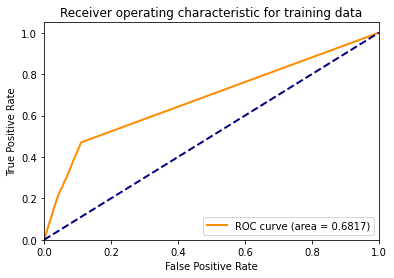

In [78]:
s#%% ROC Curve for training/validation data
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py 
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(test_target, preds)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for training data')
plt.legend(loc="lower right")
plt.show()

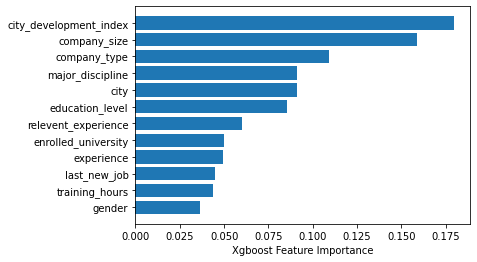

In [79]:
sorted_idx = clf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], clf.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")
plt.show()

In [80]:
!pip install shap

     |████████████████████████████████| 356 kB 13.1 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491641 sha256=5da1813d2c3c7c43377586bc0661349fe8788505eaa9be060d7da06d8c626a0a
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


In [81]:
import shap

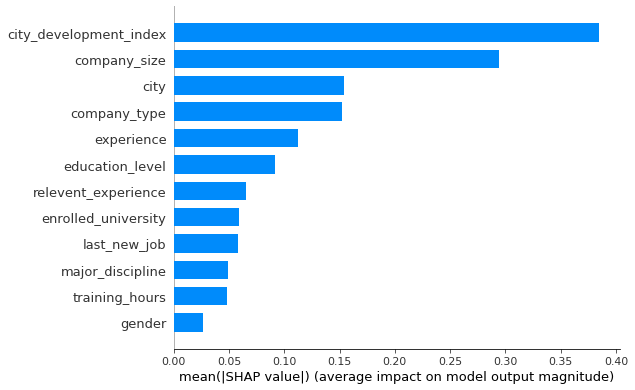

In [82]:
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_valid)
shap.summary_plot(shap_values, X_valid, plot_type="bar")

In [83]:
predictions = pd.DataFrame()
predictions['enrollee_id'] = test['enrollee_id']
predictions['target'] = preds

predictions.to_csv('submission_10.csv', index=False, header=predictions.columns)
predictions.head()

,enrollee_id,target
0,32403,0.0
1,9858,0.0
2,31806,0.0
3,27385,0.0
4,27724,0.0


In [84]:
roc_auc_score(test_target,preds)

0.6817215335908993

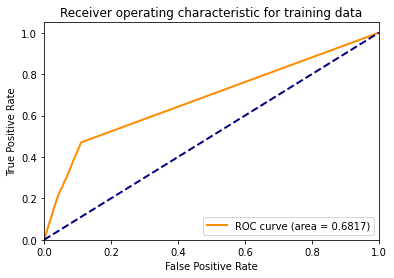

In [85]:
s#%% ROC Curve for training/validation data
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py 
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(test_target, preds)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for training data')
plt.legend(loc="lower right")
plt.show()